In [ ]:
!pip install keras-tuner

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 11.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 11.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 11.3 MB/s eta 0:00:00a 0:00:01


# 0. 모델 고정해서 사용

In [5]:
# 모델 생성
model = Sequential([
    # 첫 번째 컨볼루션 블록
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    AveragePooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    # 두 번째 컨볼루션 블록
    Conv2D(64, (3, 3), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    # 플래튼 레이어
    Flatten(),

    # 완전 연결 레이어
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax') # 출력 클래스가 10개인 경우
])

model.summary()

2024-12-10 14:48:47.092249: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-10 14:48:47.271435: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-10 14:48:47.271526: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-10 14:48:47.275486: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-10 14:48:47.275632: I tensorflow/compile

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 32)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 64)         0         
 ePooling2D)                                                     
                                                        

# 1. Data Centric AI 맛보기
- CIFAR10 테스트 데이터셋을 확인
    - 잘못 라벨링된 데이터 수정
        - labelerrors.com은 이름에서 알 수 있듯이 테스트 데이터와 label이 잘못 붙어 있는 사례를 확인할 수 있다.

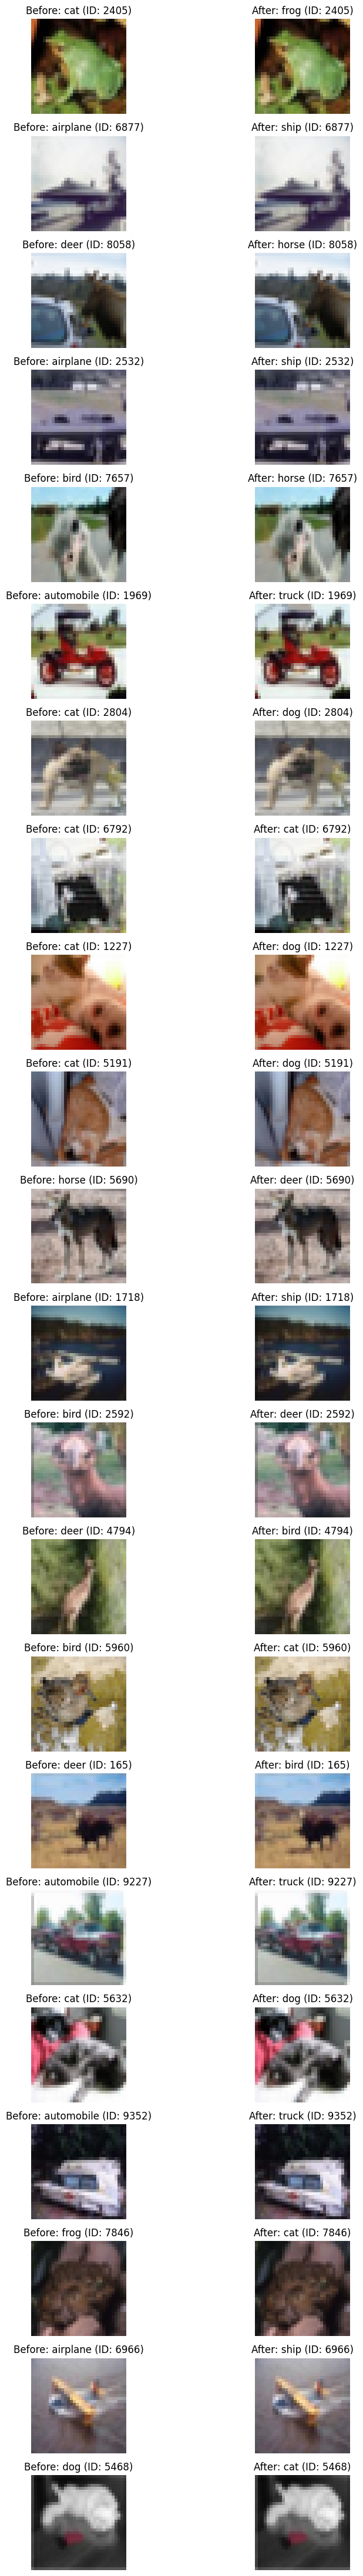

In [ ]:
# CIFAR-10 데이터 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 클래스 라벨
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 잘못된 라벨 ID
error_ids = [2405, 6877, 8058, 2532, 7657, 1969, 2804, 6792, 1227, 5191, 5690, 1718, 2592, 4794, 5960, 165, 9227, 5632, 9352, 7846, 6966, 5468]
# 수정할 라벨 값
correct_labels = [6, 8, 7, 8, 7, 9, 5, 3, 5, 5, 4, 8, 4, 2, 3, 2, 9, 5, 9, 3, 8, 3]


# 수정 전후 이미지 비교 함수
def visualize_corrections(error_ids, correct_labels, images, labels):
    num_images = len(error_ids)
    fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 2))
    
    for i, idx in enumerate(error_ids):
        # 수정 전 이미지
        axes[i, 0].imshow(images[idx])
        axes[i, 0].set_title(f"Before: {class_names[labels[idx][0]]} (ID: {idx})")
        axes[i, 0].axis('off')
        
        # 라벨 수정
        labels[idx] = correct_labels[i]
        
        # 수정 후 이미지
        axes[i, 1].imshow(images[idx])
        axes[i, 1].set_title(f"After: {class_names[correct_labels[i]]} (ID: {idx})")
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# 수정 전후 비교 시각화
visualize_corrections(error_ids, correct_labels, x_test, y_test)

In [7]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2024-12-10 14:49:42.502056: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-10 14:49:42.502164: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-10 14:49:42.502197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-10 14:49:42.502447: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-10 14:49:42.502482: I tensorflow/core/co

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18158070392137370634
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1853253223
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17946268151075050001
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [8]:
# 모델 정의 함수
def build_model(hp):
    model = Sequential([
        Conv2D(hp.Int('conv1_filters', min_value=16, max_value=64, step=16), (3, 3), activation='relu', input_shape=(32, 32, 3)),
        AveragePooling2D((2, 2)),
        BatchNormalization(),
        Conv2D(hp.Int('conv2_filters', min_value=32, max_value=128, step=32), (3, 3), activation='relu'),
        AveragePooling2D((2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'),
        Dropout(hp.Choice('dropout_rate', [0.2, 0.3, 0.5])),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # 시도할 모델의 개수
    executions_per_trial=2,  # 각 하이퍼파라미터 조합별 반복 횟수
    directory='cifar10_tuning',
    project_name='cifar10_project'
)

tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# 최적의 하이퍼파라미터 출력
best_hps = tuner.get_best_hyperparameters(1)[0]
print(f"최적 필터 크기 1: {best_hps.get('conv1_filters')}")
print(f"최적 필터 크기 2: {best_hps.get('conv2_filters')}")
print(f"최적 드롭아웃 비율: {best_hps.get('dropout_rate')}")

Trial 10 Complete [00h 03m 34s]
val_accuracy: 0.7361499965190887

Best val_accuracy So Far: 0.7404000163078308
Total elapsed time: 00h 39m 58s
최적 필터 크기 1: 48
최적 필터 크기 2: 64
최적 드롭아웃 비율: 0.5


In [10]:
# 최적 하이퍼파라미터로 모델 생성 및 학습
model = tuner.hypermodel.build(best_hps)
model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# 모델 저장
model.save('cifar10_saved_model.h5')

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5639 - accuracy: 0.4912 - val_loss: 1.2136 - val_accuracy: 0.5689
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0923 - accuracy: 0.6185 - val_loss: 1.0220 - val_accuracy: 0.6440
Epoch 3/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9491 - accuracy: 0.6682 - val_loss: 0.8747 - val_accuracy: 0.6988
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8239 - accuracy: 0.7130 - val_loss: 1.1486 - val_accuracy: 0.6044
Epoch 5/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7366 - accuracy: 0.7431 - val_loss: 0.8702 - val_accuracy: 0.6958
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6561 - accuracy: 0.7716 - val_loss: 0.9974 - val_accuracy: 0.6646
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5869 - accuracy: 0.7952 - val_loss: 0.8233 - val_ac

In [14]:
model.save('cifar10_saved_model')

2024-12-10 16:41:46.661193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,384]
	 [[{{node inputs}}]]
2024-12-10 16:41:46.901821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,384]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: cifar10_saved_model/assets


INFO:tensorflow:Assets written to: cifar10_saved_model/assets


# 4.TFLite 모델 만들기 (옵션)


In [11]:
import tensorflow as tf

# HDF5 파일로 저장된 모델 로드
model = tf.keras.models.load_model('cifar10_saved_model.h5')

# TFLite 변환
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# TFLite 파일 저장
with open('cifar10_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TFLite 모델이 성공적으로 저장되었습니다!")

2024-12-10 15:45:55.037386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,384]
	 [[{{node inputs}}]]
2024-12-10 15:45:55.284091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,384]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /tmp/tmpnpqu2__7/assets


INFO:tensorflow:Assets written to: /tmp/tmpnpqu2__7/assets


TFLite 모델이 성공적으로 저장되었습니다!


2024-12-10 15:45:56.031755: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-12-10 15:45:56.031807: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-12-10 15:45:56.034210: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpnpqu2__7
2024-12-10 15:45:56.035338: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-12-10 15:45:56.035364: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpnpqu2__7
2024-12-10 15:45:56.040157: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2024-12-10 15:45:56.041426: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-12-10 15:45:56.094258: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpnpqu2__7
2024-12

In [12]:
# TFLite 모델 서명 확인
interpreter = tf.lite.Interpreter(model_path='cifar10_model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("입력 텐서 정보:", input_details)
print("출력 텐서 정보:", output_details)

입력 텐서 정보: [{'name': 'serving_default_conv2d_2_input:0', 'index': 0, 'shape': array([ 1, 32, 32,  3], dtype=int32), 'shape_signature': array([-1, 32, 32,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
출력 텐서 정보: [{'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
